In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch.nn as nn

In [61]:
torch.set_default_dtype(torch.float32)


In [3]:
X=torch.linspace(0.0,50.0,50).reshape(-1,1)
X.dtype


torch.float32

In [21]:
print(X)

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])


In [4]:
torch.manual_seed(71)
e=torch.randint(-8,9,(50,1),dtype=float)

In [6]:

e=e.to(torch.float32)

In [7]:
e.dtype

torch.float32

In [8]:
y=2*X+1+e
y.shape
y = y.to(torch.float32)
y.dtype

torch.float32

In [22]:
print(Y)

tensor([[ 4.],
        [11.],
        [ 8.],
        [14.],
        [12.],
        [ 8.],
        [16.],
        [11.],
        [22.],
        [21.],
        [24.],
        [27.],
        [27.],
        [20.],
        [35.],
        [37.],
        [28.],
        [36.],
        [31.],
        [32.],
        [39.],
        [43.],
        [48.],
        [42.],
        [47.],
        [55.],
        [56.],
        [59.],
        [62.],
        [65.],
        [63.],
        [71.],
        [72.],
        [67.],
        [64.],
        [67.],
        [71.],
        [83.],
        [78.],
        [88.],
        [81.],
        [82.],
        [88.],
        [80.],
        [89.],
        [98.],
        [86.],
        [93.],
        [91.],
        [98.]], dtype=torch.float64)


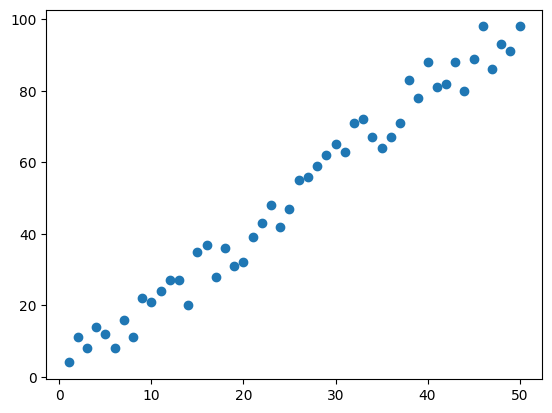

In [8]:
plt.scatter(X.numpy(),Y.numpy())

In [9]:
class Model(nn.Module):
  def __init__(self,in_features,out_features):
    super().__init__()
    self.linear=nn.Linear(in_features,out_features)
  def forward(self,x):
    y_pred=self.linear(x)
    return y_pred



In [10]:
torch.manual_seed(59)
model=Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [13]:
x=torch.tensor([2.0])
print(model.forward(x))


tensor([1.1758], grad_fn=<ViewBackward0>)


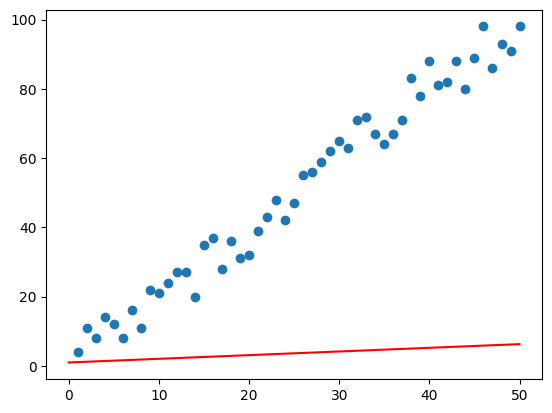

In [31]:
x1=np.linspace(0.0,50.0,50)
w1=0.1059
b1=0.9637
y1=w1*x1+b1
plt.scatter(X.numpy(),Y.numpy())
plt.plot(x1,y1,'r')

In [12]:
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)
epochs=50
losses=[]
for i in range(epochs):
  i=i+1
  y_pred=model.forward(X)
  loss=criterion(y_pred,y)
  losses.append(loss)
  print(f"epoch{i} loss:{loss.item()} weight:{model.linear.weight.item()} bias:{model.linear.bias.item()}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()






epoch1 loss:2996.4072265625 weight:0.10597813129425049 bias:0.9637961387634277
epoch2 loss:1417.8204345703125 weight:3.271233320236206 bias:1.0585696697235107
epoch3 loss:676.7648315429688 weight:1.1024935245513916 bias:0.9948908686637878
epoch4 loss:328.8814392089844 weight:2.5883874893188477 bias:1.0397764444351196
epoch5 loss:165.5699005126953 weight:1.5702766180038452 bias:1.010277509689331
epoch6 loss:88.90411376953125 weight:2.2678072452545166 bias:1.0317431688308716
epoch7 loss:52.913631439208984 weight:1.7898505926132202 bias:1.01828932762146
epoch8 loss:36.01784896850586 weight:2.1172897815704346 bias:1.0287601947784424
epoch9 loss:28.085952758789062 weight:1.8929046392440796 bias:1.0228382349014282
epoch10 loss:24.362083435058594 weight:2.04660701751709 bias:1.0281473398208618
epoch11 loss:22.6136417388916 weight:1.9412593841552734 bias:1.0257606506347656
epoch12 loss:21.792560577392578 weight:2.013401985168457 bias:1.0286461114883423
epoch13 loss:21.40682601928711 weight:1.9

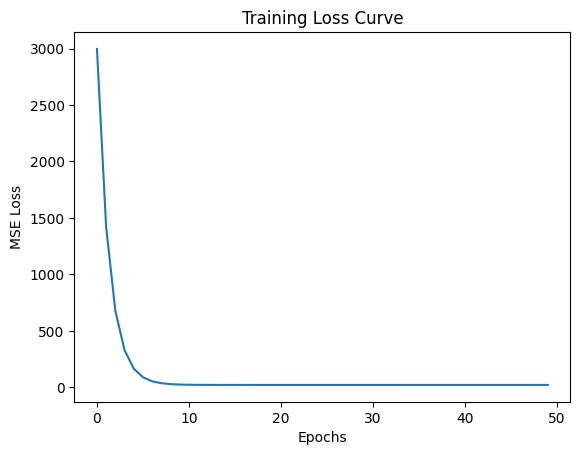

In [22]:
# Assuming losses is a list of floats
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.show()

In [24]:
x=np.linspace(0.0,50.0,50)
current_weight=model.linear.weight.item()
current_bias=model.linear.bias.item()
predicted_y=current_weight*x+current_bias


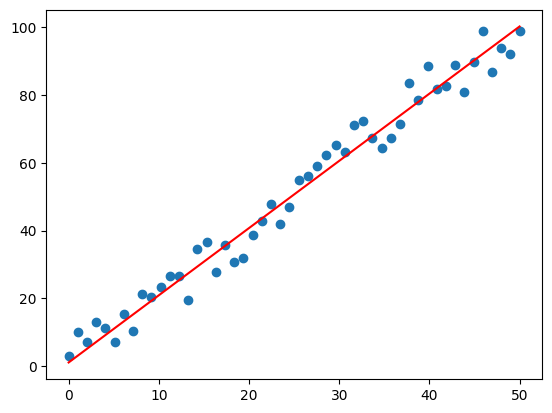

In [25]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x,predicted_y,'r')

In [26]:
for name,param in model.named_parameters():
  print(name,'\t',param.item())

linear.weight 	 1.983210563659668
linear.bias 	 1.0564080476760864
